# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
import os
fater_path = os.path.abspath('..')
print(fater_path)
os.chdir(fater_path)
import sys
sys.path.append("..")

/home/mark/Documents/PythonProject/ShuffleNet-Retrain/ShuffleNetV2+


In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

## 导入工具包

In [4]:
import pandas as pd
import numpy as np

## 载入类别名称和ID easy

In [5]:
dataset_name = 'test_easy_classes'
model_path = './models/2023-10-09-01-47_max_epoch_100/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入测试集预测结果表格

In [6]:
df = pd.read_csv(model_path + dataset_name + '-测试集预测结果.csv')

In [7]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,covering-预测置信度,device-预测置信度,domestic_animal-预测置信度,mater-预测置信度,person-预测置信度,plant-预测置信度,structure-预测置信度,vertebrate-预测置信度
0,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,3,mater,1,device,6,structure,False,0.086672,0.303364,0.024815,0.319759,0.077418,0.028977,0.114927,0.044068
1,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,2,domestic_animal,4,person,0,covering,True,0.198083,0.007122,0.381109,0.024061,0.354962,0.008848,0.005868,0.019947
2,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,4,person,6,structure,3,mater,False,0.035133,0.015553,0.026626,0.090556,0.568884,0.090343,0.133713,0.039194
3,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,0,covering,4,person,6,structure,True,0.647956,0.015353,0.014450,0.017180,0.247723,0.021052,0.022783,0.013503
4,data/SOD-SemanticDataset/test/COME15K-Easy/COM...,0,covering,4,person,0,covering,2,domestic_animal,True,0.205463,0.004536,0.008877,0.006329,0.760489,0.004672,0.005541,0.004094


## 绘制某一类别的ROC曲线

In [8]:
specific_class = 'covering'

In [9]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [10]:
y_test

0        True
1        True
2        True
3        True
4        True
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: 标注类别名称, Length: 4600, dtype: bool

In [11]:
# 二分类置信度
y_score = df[specific_class + '-预测置信度']

In [12]:
y_score

0       0.086672
1       0.198083
2       0.035133
3       0.647956
4       0.205463
          ...   
4595    0.094083
4596    0.018882
4597    0.005656
4598    0.016877
4599    0.010100
Name: covering-预测置信度, Length: 4600, dtype: float64

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

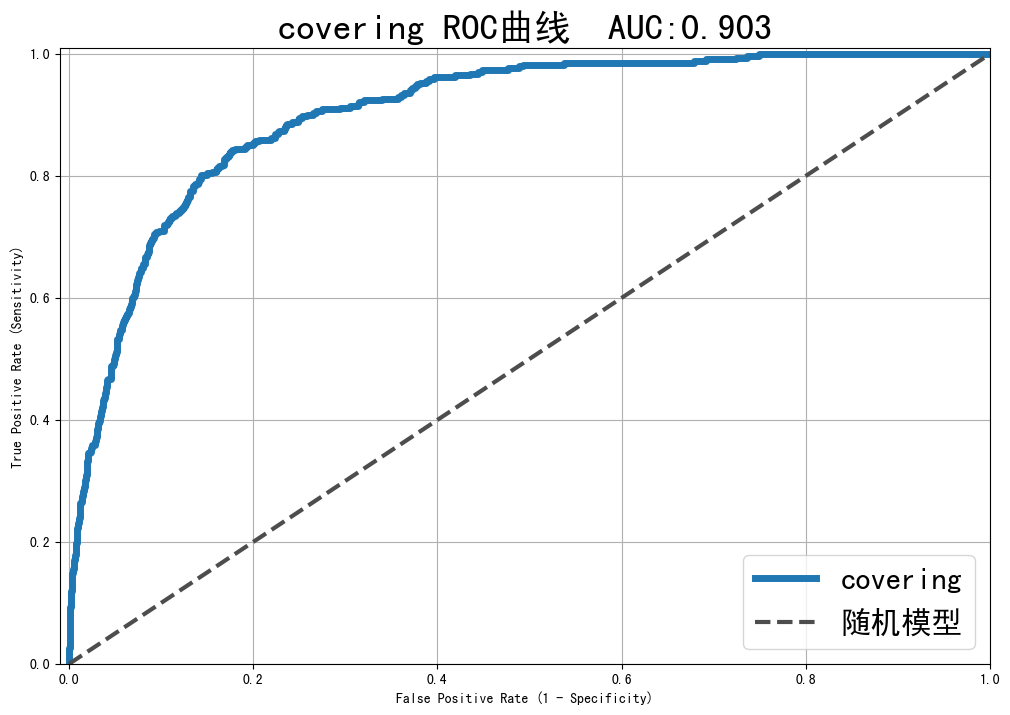

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [15]:
auc(fpr, tpr)

0.9032272241587216

## 绘制所有类别的ROC曲线

In [16]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [17]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [18]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

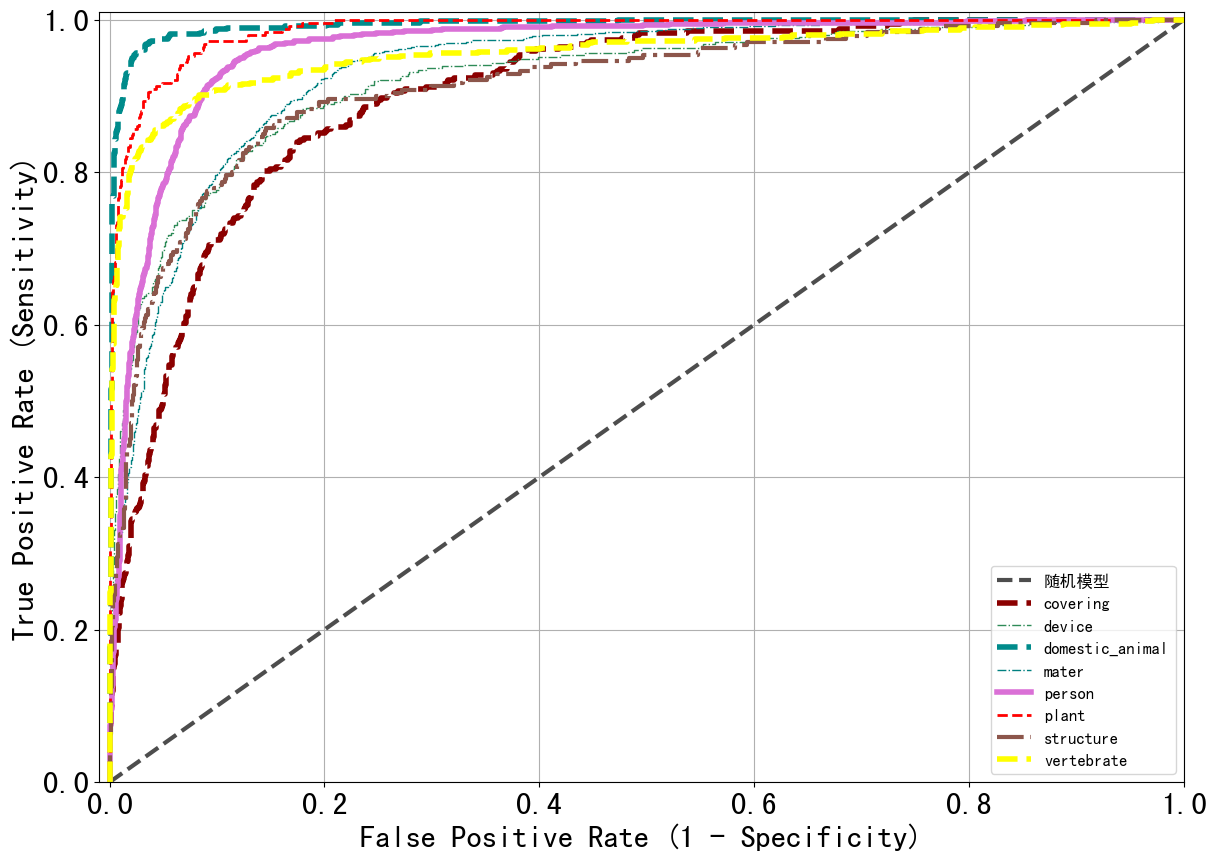

In [19]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [20]:
df_report = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [21]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,covering,0.513158,0.342105,0.410526,342.0,0.342105,0.482158
1,device,0.745763,0.539216,0.625889,408.0,0.539216,0.672884
2,domestic_animal,0.834254,0.953684,0.889980,475.0,0.953684,0.943512
3,mater,0.657627,0.810867,0.726252,957.0,0.810867,0.790650
4,person,0.823051,0.879710,0.850438,1380.0,0.879710,0.899250
5,plant,0.845133,0.757937,0.799163,252.0,0.757937,0.861685
6,structure,0.575758,0.475000,0.520548,240.0,0.475000,0.523389
7,vertebrate,0.887912,0.739927,0.807193,546.0,0.739927,0.870487
8,macro avg,0.735332,0.687306,0.703749,4600.0,0.687306,0.755502
9,weighted avg,0.755904,0.758478,0.750908,4600.0,0.758478,0.805057


In [22]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [23]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [24]:
df_report['AUC'] = auc_list

In [25]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.513158,0.342105,0.410526,342.0,0.342105,0.482158,0.903227
1,device,0.745763,0.539216,0.625889,408.0,0.539216,0.672884,0.922557
2,domestic_animal,0.834254,0.953684,0.889980,475.0,0.953684,0.943512,0.992509
3,mater,0.657627,0.810867,0.726252,957.0,0.810867,0.790650,0.933297
4,person,0.823051,0.879710,0.850438,1380.0,0.879710,0.899250,0.961225
5,plant,0.845133,0.757937,0.799163,252.0,0.757937,0.861685,0.986895
6,structure,0.575758,0.475000,0.520548,240.0,0.475000,0.523389,0.913665
7,vertebrate,0.887912,0.739927,0.807193,546.0,0.739927,0.870487,0.955167
8,macro avg,0.735332,0.687306,0.703749,4600.0,0.687306,0.755502,0.946068
9,weighted avg,0.755904,0.758478,0.750908,4600.0,0.758478,0.805057,0.949109


In [26]:
df_report.to_csv(model_path + dataset_name + '-各类别准确率评估指标.csv', index=False)

## 载入类别名称和ID hard

In [27]:
dataset_name = 'test_hard_classes'
model_path = './models/2023-10-09-01-47_max_epoch_100/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入测试集预测结果表格

In [28]:
df = pd.read_csv(model_path + dataset_name + '-测试集预测结果.csv')

In [29]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,covering-预测置信度,device-预测置信度,domestic_animal-预测置信度,mater-预测置信度,person-预测置信度,plant-预测置信度,structure-预测置信度,vertebrate-预测置信度
0,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,4,person,3,mater,True,0.801112,0.006859,0.002550,0.015600,0.158353,0.006221,0.005665,0.003641
1,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,6,structure,3,mater,0,covering,True,0.113383,0.027640,0.006023,0.259255,0.044438,0.006826,0.538320,0.004116
2,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,4,person,2,domestic_animal,True,0.600943,0.008280,0.050587,0.032752,0.277345,0.005105,0.013126,0.011862
3,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,3,mater,1,device,False,0.017682,0.046715,0.005153,0.087193,0.813342,0.003787,0.019615,0.006513
4,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,0,covering,3,mater,4,person,True,0.681542,0.039885,0.012647,0.156968,0.054006,0.019469,0.012044,0.023439


## 绘制某一类别的ROC曲线

In [30]:
specific_class = 'covering'

In [31]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [32]:
y_test

0        True
1        True
2        True
3        True
4        True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: 标注类别名称, Length: 3000, dtype: bool

In [33]:
# 二分类置信度
y_score = df[specific_class + '-预测置信度']

In [34]:
y_score

0       0.801112
1       0.113383
2       0.600943
3       0.017682
4       0.681542
          ...   
2995    0.018748
2996    0.007847
2997    0.161484
2998    0.011064
2999    0.024494
Name: covering-预测置信度, Length: 3000, dtype: float64

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

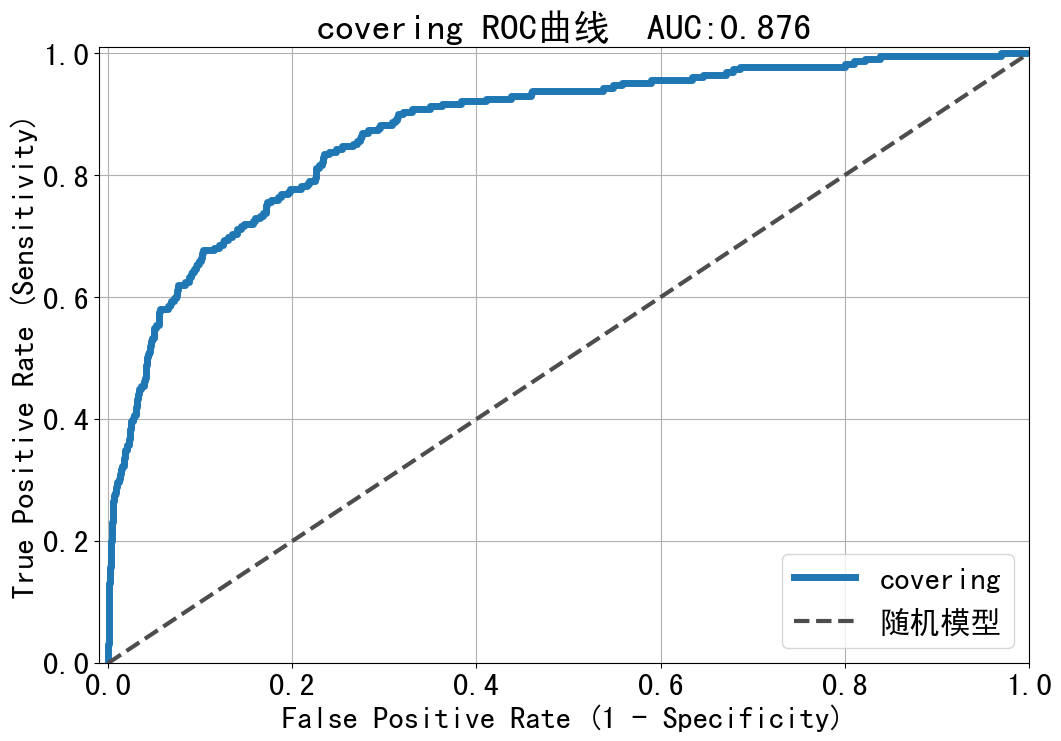

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [37]:
auc(fpr, tpr)

0.8761880297970717

## 绘制所有类别的ROC曲线

In [38]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [39]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [40]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

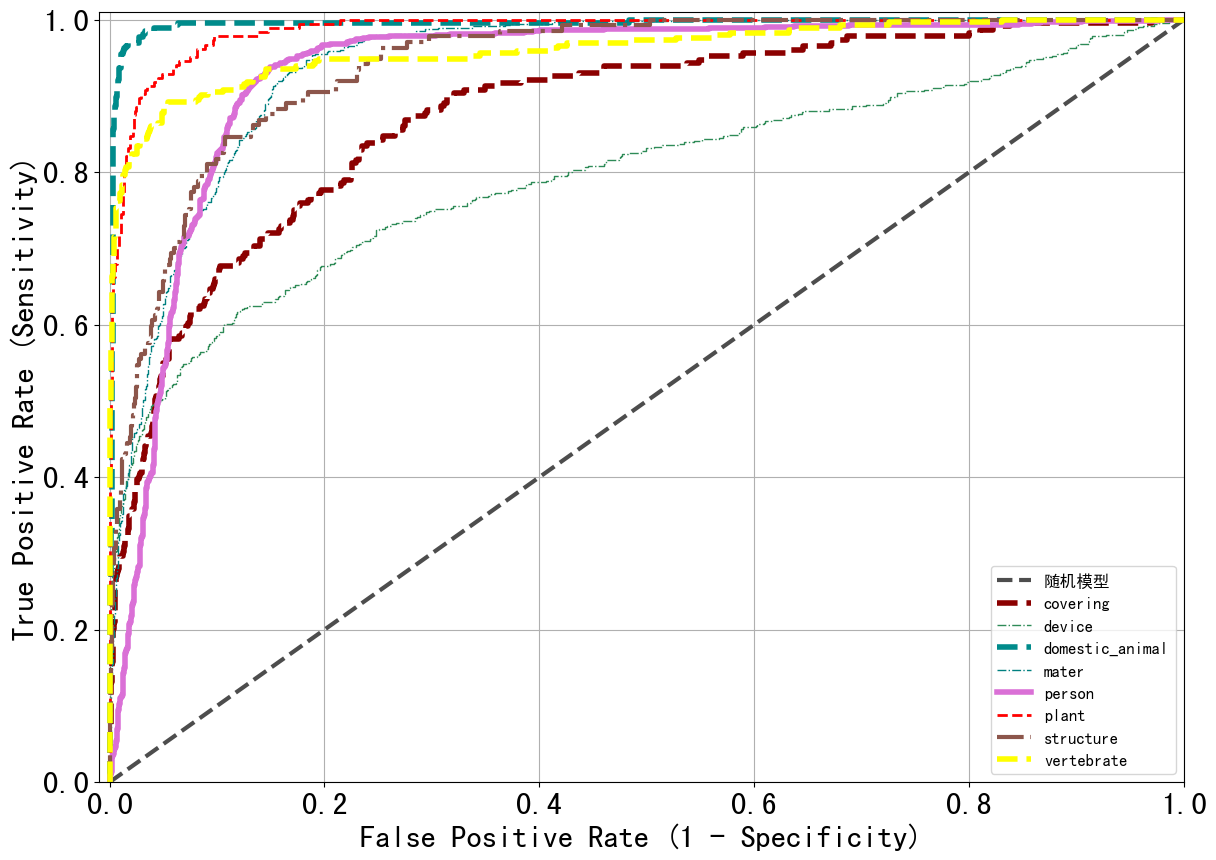

In [41]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [42]:
df_report = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [43]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,covering,0.651376,0.310044,0.420118,229.0,0.310044,0.501214
1,device,0.799228,0.405088,0.537662,511.0,0.405088,0.633223
2,domestic_animal,0.882759,0.962406,0.920863,266.0,0.962406,0.943113
3,mater,0.615196,0.858120,0.716631,585.0,0.858120,0.788336
4,person,0.722503,0.902900,0.802691,793.0,0.902900,0.768013
5,plant,0.836364,0.750000,0.790831,184.0,0.750000,0.867867
6,structure,0.572581,0.518248,0.544061,137.0,0.518248,0.539601
7,vertebrate,0.902439,0.752542,0.820702,295.0,0.752542,0.883298
8,macro avg,0.747806,0.682419,0.694195,3000.0,0.682419,0.740583
9,weighted avg,0.741258,0.727667,0.711274,3000.0,0.727667,0.751207


In [44]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [45]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [46]:
df_report['AUC'] = auc_list

In [47]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.651376,0.310044,0.420118,229.0,0.310044,0.501214,0.876188
1,device,0.799228,0.405088,0.537662,511.0,0.405088,0.633223,0.795596
2,domestic_animal,0.882759,0.962406,0.920863,266.0,0.962406,0.943113,0.994635
3,mater,0.615196,0.858120,0.716631,585.0,0.858120,0.788336,0.942859
4,person,0.722503,0.902900,0.802691,793.0,0.902900,0.768013,0.932100
5,plant,0.836364,0.750000,0.790831,184.0,0.750000,0.867867,0.987262
6,structure,0.572581,0.518248,0.544061,137.0,0.518248,0.539601,0.940693
7,vertebrate,0.902439,0.752542,0.820702,295.0,0.752542,0.883298,0.960787
8,macro avg,0.747806,0.682419,0.694195,3000.0,0.682419,0.740583,0.928765
9,weighted avg,0.741258,0.727667,0.711274,3000.0,0.727667,0.751207,0.918820


In [48]:
df_report.to_csv(model_path + dataset_name + '-各类别准确率评估指标.csv', index=False)